In [68]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cosine
from utils import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [69]:
data_dir = "/media/arjun/Data/eluvio/data/"

In [70]:
data_train = makesimfeaturedf(data_dir)
data_train['cast_dp'] = data_train['cast_dp'].fillna(0)
data_train['place_dp'] = data_train['place_dp'].fillna(0)
data_train['action_dp'] = data_train['action_dp'].fillna(0)
data_train['audio_dp'] = data_train['audio_dp'].fillna(0)

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [71]:
data_train

,place_dp,cast_dp,action_dp,audio_dp,boundary_truth
0,0.578903,0.000000,0.000000,0.917746,0
1,0.741456,0.000000,0.000000,0.945748,0
2,0.860872,0.000000,0.000000,0.528213,0
3,0.727043,0.000000,0.000000,0.653595,0
4,0.456156,0.000000,0.000000,0.705958,1
...,...,...,...,...,...
105972,0.762393,0.759129,0.820332,0.479482,1
105973,0.586763,0.396452,0.655677,0.953961,1
105974,0.546400,0.575942,0.814876,0.874159,1
105975,0.736786,0.641870,0.911810,0.810694,0


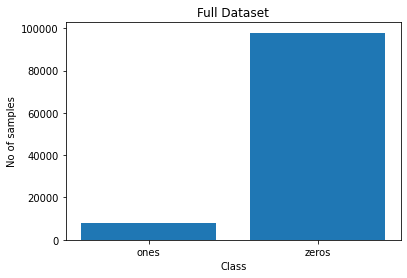

In [72]:
Y = data_train['boundary_truth']
X = data_train.drop(columns=['boundary_truth'])

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

imbal(Y,'Full Dataset')

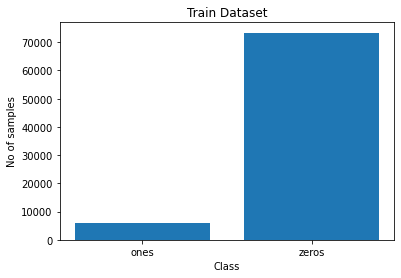

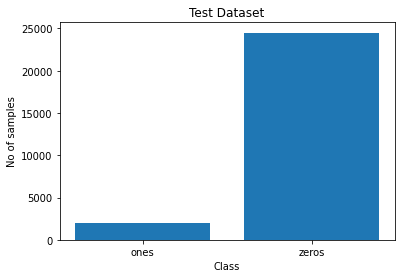

Test accuract is :  0.9138327986412531


In [73]:
imbal(y_train,'Train Dataset')
imbal(y_test,'Test Dataset')
clf1 = KNeighborsClassifier().fit(x_train, y_train)
print("Test accuract is : ",clf1.score(x_test, y_test))


In [74]:
generate_predictions_dir_LR(clf1,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr1/');


/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

# Coarse predictions given

In [75]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/data/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.4418872028438688,
    "mAP": 0.4564401595678161,
    "Miou": 0.45414800530021754,
    "Precision": 0.2761656092479825,
    "Recall": 0.7473442326299846,
    "F1": 0.39309552999275693
}


# KNN Without sampling

In [76]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr1/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.30079042370763087,
    "mAP": 0.3106786272526226,
    "Miou": 0.3426166826535341,
    "Precision": 0.5342522938717706,
    "Recall": 0.12604315828627943,
    "F1": 0.19920247085457896
}


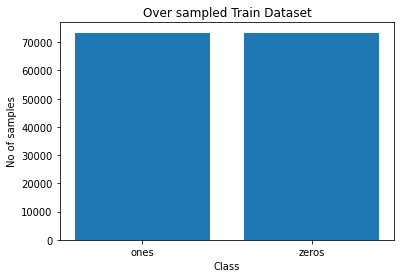

Test accuract is :  0.7355727495753915


In [77]:
X1_resampled, y1_resampled = SMOTE(random_state=123).fit_resample(x_train, y_train)
imbal(y1_resampled,'Over sampled Train Dataset')
clf2 = KNeighborsClassifier().fit(X1_resampled, y1_resampled)
print("Test accuract is : ",clf2.score(x_test, y_test))


In [78]:
generate_predictions_dir_LR(clf2,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr2/');


/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

# KNN Over sampling

In [79]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr2/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.5812168468330086,
    "mAP": 0.5735931851621817,
    "Miou": 0.4793941305957929,
    "Precision": 0.276096372587527,
    "Recall": 0.8623173522748953,
    "F1": 0.4087102162264981
}


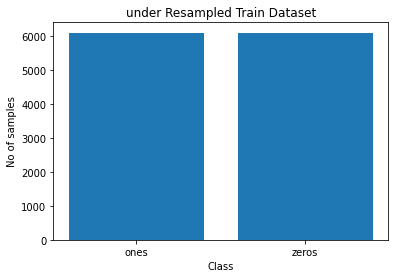

Test accuract is :  0.6485752028684657


In [80]:
X2_resampled, y2_resampled = RandomUnderSampler(random_state=123).fit_resample(x_train, y_train)
imbal(y2_resampled,'under Resampled Train Dataset')
clf3 = KNeighborsClassifier().fit(X2_resampled, y2_resampled)
print("Test accuract is : ",clf3.score(x_test, y_test))


In [81]:
generate_predictions_dir_LR(clf3,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr3/');


/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

# KNN Under sampling

In [82]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr3/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.17974113103317563,
    "mAP": 0.19112205712931624,
    "Miou": 0.37837250328419675,
    "Precision": 0.16354380841309596,
    "Recall": 0.7612370742132829,
    "F1": 0.26256056850200127
}


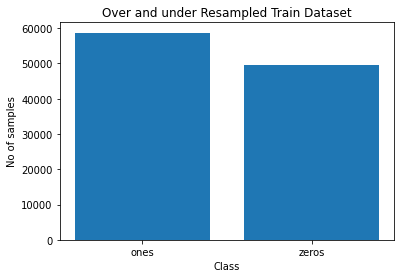

Test accuract is :  0.6843177958105303


In [83]:
X3_resampled, y3_resampled = SMOTEENN(random_state=123).fit_resample(x_train, y_train)
imbal(y3_resampled,'Over and under Resampled Train Dataset')
clf4 = KNeighborsClassifier().fit(X3_resampled, y3_resampled)
print("Test accuract is : ",clf4.score(x_test, y_test))

In [84]:
generate_predictions_dir_LR(clf4,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr4/')

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

In [85]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr4/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.2634912915127264,
    "mAP": 0.27305655507348414,
    "Miou": 0.43162796376145063,
    "Precision": 0.21485679610619718,
    "Recall": 0.8768767300525099,
    "F1": 0.33727663186040563
}


# Oversampling Random Forest 

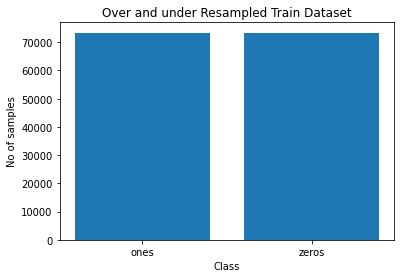

Test accuract is :  0.9521594308198948


In [86]:
X5_resampled, y5_resampled = SMOTE(random_state=123).fit_resample(x_train, y_train)
imbal(y5_resampled,'Over and under Resampled Train Dataset')
clf5 = RandomForestClassifier().fit(X5_resampled, y5_resampled)
print("Test accuract is : ",clf5.score(X, Y))

In [87]:
generate_predictions_dir_LR(clf5,'/media/arjun/Data/eluvio/data/','/media/arjun/Data/eluvio/lr5/')

/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/home/arjun/.local/lib/python3.7/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in float_s

In [88]:
! python evaluate_sceneseg.py --datadir "/media/arjun/Data/eluvio/lr5/"

# of IMDB IDs: 64
Scores: {
    "AP": 0.8235445887909287,
    "mAP": 0.8190186682441253,
    "Miou": 0.7099073431880217,
    "Precision": 0.6267319958781696,
    "Recall": 0.8567636697458098,
    "F1": 0.7156548838032766
}
